In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [59]:
# def f(x):
#     return 4*x**4 - 12*x**3 + 30*x**2 + 12
# def f(x):
#     return np.sin(x) - np.cos(x)
# def f(x):
#     return np.sin(2*x) + np.sin(x) + np.cos(3*x)
def f(x):
    return np.sin(x) ** 2 - np.cos(x) ** 2

# Citirea intervalului din fișier
def read_interval(filename="interval3.txt"):
    with open(filename, 'r') as file:
        lines = file.readlines()
        x0 = float(lines[0].strip())
        xn = float(lines[1].strip())
        return x0, xn

# Generarea punctelor de interpolare
def generate_points(x0, xn, n):
    points = [x0]
    inner_points = []

    for _ in range(n-1):
        new_point = random.uniform(x0, xn)
        inner_points.append(new_point)
    
    inner_points.sort()
    points.extend(inner_points)
    points.append(xn)
    
    return np.array(points)

# Metoda celor mai mici patrate pt aproximarea polinomiala
def least_squares_polynomial(x, y, m):
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = np.sum(x ** (i + j))
        b[i] = np.sum(y * (x ** i))
    
    coeffs = np.linalg.solve(A, b)
    
    return coeffs

# Schema lui Horner pentru evaluarea polinomului
def horner(coeffs, x):
    result = 0
    for coef in reversed(coeffs):
        result = result * x + coef
    return result

# Calculul erorilor
def calculate_errors(coeffs, x_vals, y_vals, x_prime):
    p_x_prime = horner(coeffs, x_prime)
    error_x_prime = abs(p_x_prime - f(x_prime))

    sum_errors = 0
    for i in range(len(x_vals)):
        p_xi = horner(coeffs, x_vals[i])
        sum_errors += abs(p_xi - y_vals[i])
    
    return p_x_prime, error_x_prime, sum_errors


Polinomul de grad 1:
Coeficientii polinomului: [-0.57916188 -0.00927199]
Pm(2.903870837643406) = -0.6060865497395784
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.2830031944587664
Suma erorilor absolute: 3.7046772244746555


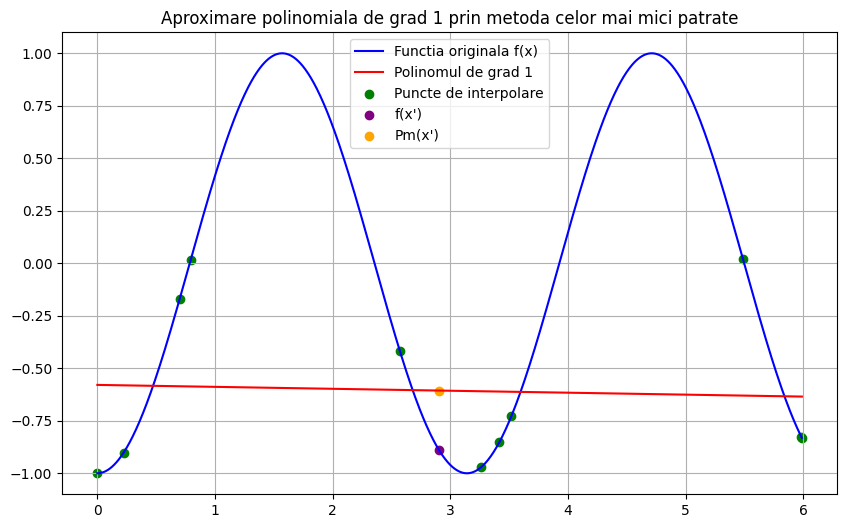


Polinomul de grad 2:
Coeficientii polinomului: [-0.59892381  0.01761073 -0.00444563]
Pm(2.903870837643406) = -0.5852721578192004
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.30381758637914447
Suma erorilor absolute: 3.6857098362896745


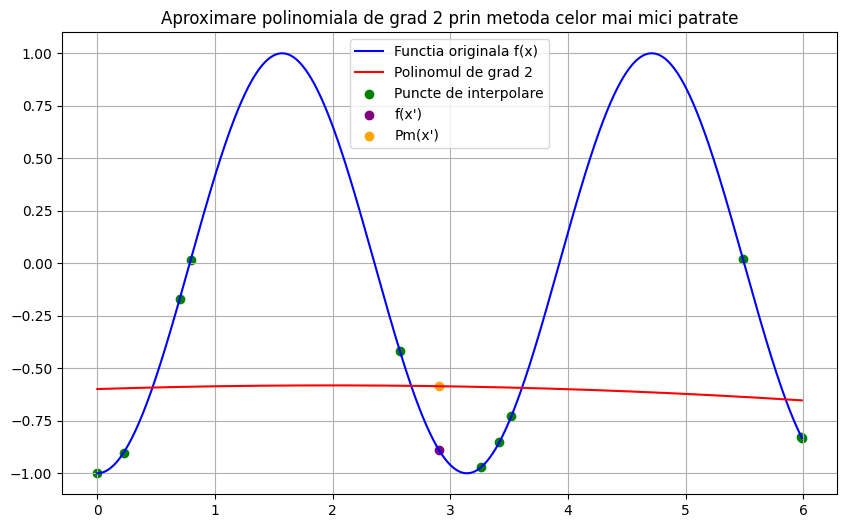


Polinomul de grad 3:
Coeficientii polinomului: [-0.85711762  0.92630939 -0.40468286  0.04320141]
Pm(2.903870837643406) = -0.5218451464073226
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.36724459779102225
Suma erorilor absolute: 2.8691794747795365


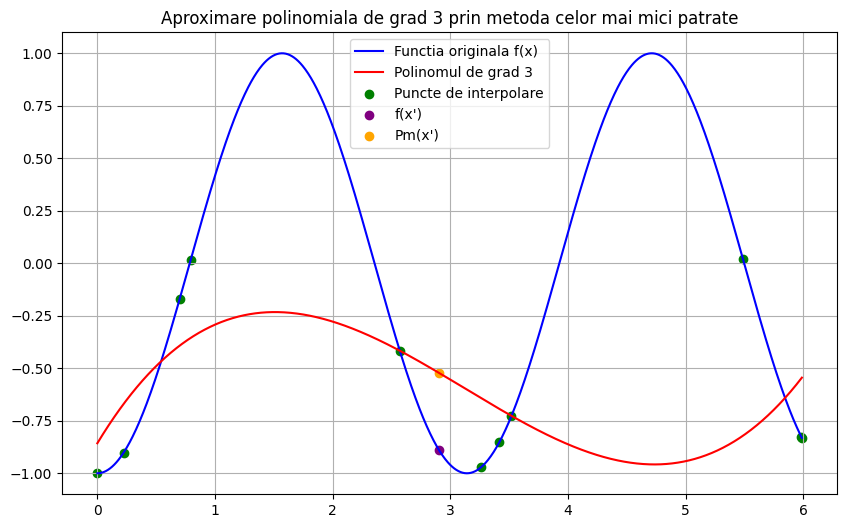


Polinomul de grad 4:
Coeficientii polinomului: [-1.19362889  2.79711258 -2.10384318  0.53595496 -0.04354468]
Pm(2.903870837643406) = -0.7842525283786516
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.1048372158196933
Suma erorilor absolute: 1.3661317864254445


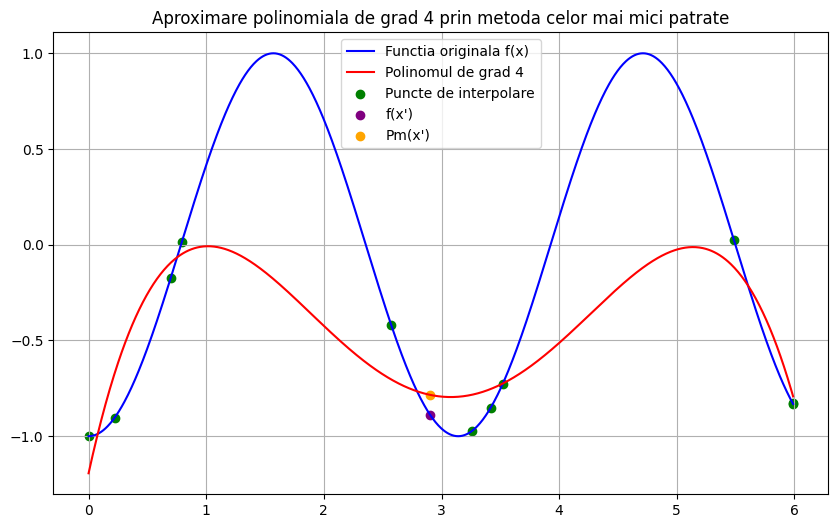


Polinomul de grad 5:
Coeficientii polinomului: [-1.08761707  1.53282423 -0.01836942 -0.4989948   0.15600939 -0.01321133]
Pm(2.903870837643406) = -0.6448251262663884
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.24426461793195642
Suma erorilor absolute: 0.6725138316639455


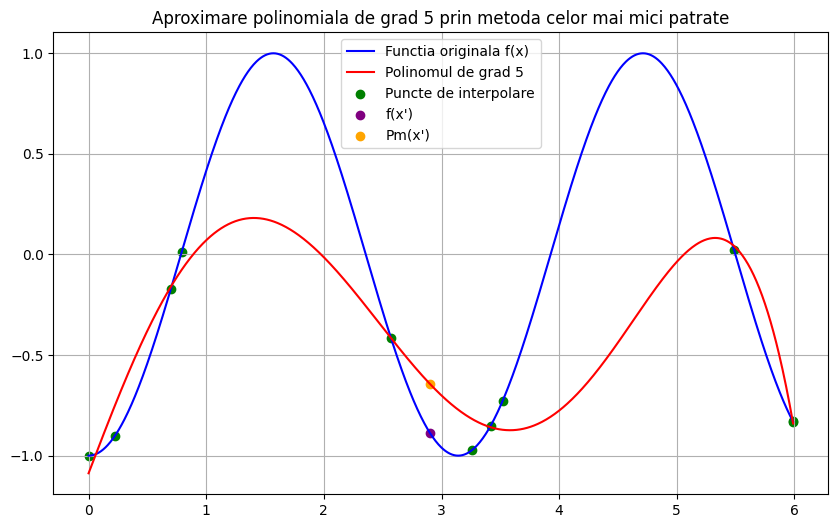


Polinomul de grad 6:
Coeficientii polinomului: [-0.98181263 -0.78383747  5.32570572 -4.50901966  1.47313097 -0.20952542
  0.01086994]
Pm(2.903870837643406) = -0.7574181630849206
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.13167158111342425
Suma erorilor absolute: 0.29994654028816353


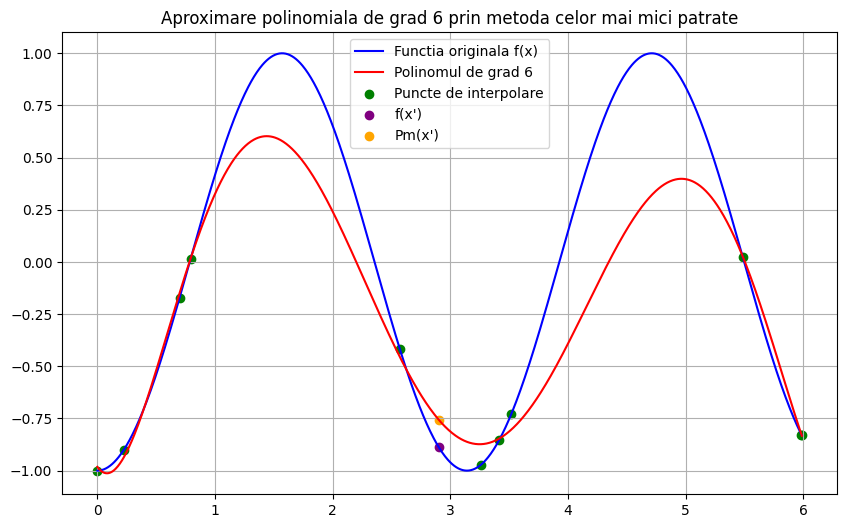


Polinomul de grad 7:
Coeficientii polinomului: [-0.99966597 -0.02501453  2.04854508  0.34434616 -1.56359287  0.69531775
 -0.11618782  0.00676128]
Pm(2.903870837643406) = -0.8696924314902457
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.01939731270809919
Suma erorilor absolute: 0.027767528873903047


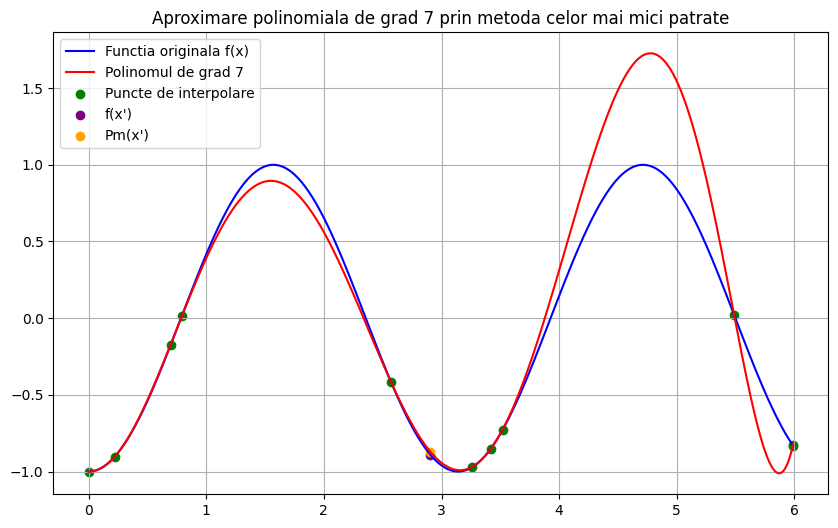


Polinomul de grad 8:
Coeficientii polinomului: [-1.00021969e+00  1.54970382e-01  8.40486494e-01  2.73105190e+00
 -3.56044021e+00  1.54216788e+00 -3.07873867e-01  2.88105322e-02
 -1.01178811e-03]
Pm(2.903870837643406) = -0.8792550629318275
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.00983468126651732
Suma erorilor absolute: 0.01757725011428085


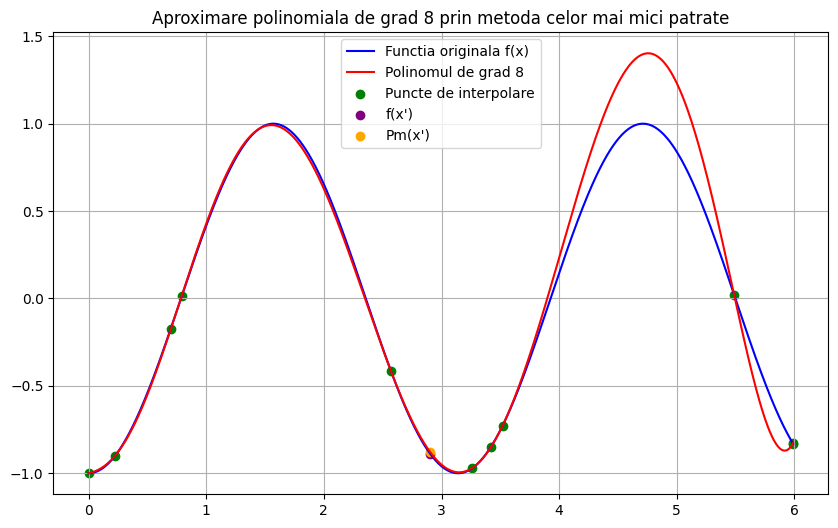


Polinomul de grad 9:
Coeficientii polinomului: [-1.00000626e+00  3.38216153e-02  1.72754357e+00  6.94366565e-01
 -1.41405645e+00  3.18904809e-01  9.37529718e-02 -4.70602323e-02
  6.63301032e-03 -3.17592960e-04]
Pm(2.903870837643406) = -0.8822799766666701
|Pm(2.903870837643406) - f(2.903870837643406)| = 0.006809767531674726
Suma erorilor absolute: 0.002580572451188645


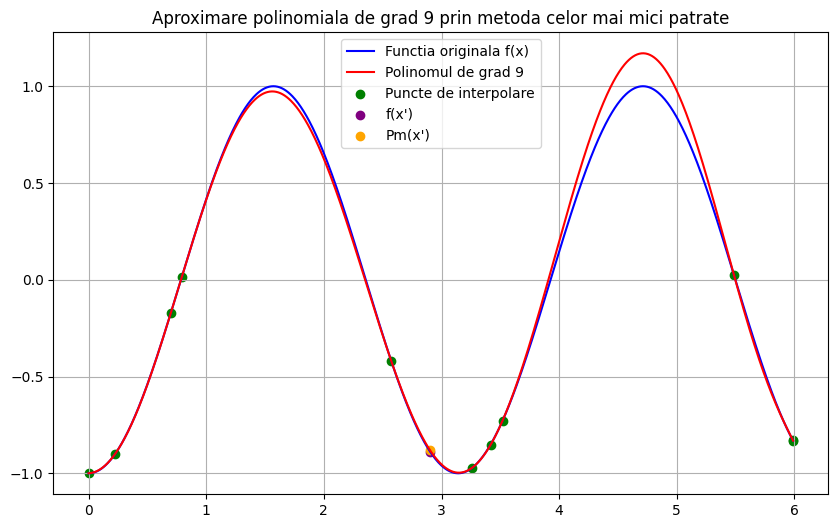

In [ ]:
n = 10
x0, xn = read_interval()

x_values = generate_points(x0, xn, n)

y_values = np.array([f(x) for x in x_values])

x_prime = np.mean(x_values)

for m in range(1, 6):
    print(f"\nPolinomul de grad {m}:")
    
    coeffs = least_squares_polynomial(x_values, y_values, m)
    
    p_x_prime, error_x_prime, sum_errors = calculate_errors(
        coeffs, x_values, y_values, x_prime
    )
    
    print(f"Coeficientii polinomului: {coeffs}")
    print(f"Pm({x_prime}) = {p_x_prime}")
    print(f"|Pm({x_prime}) - f({x_prime})| = {error_x_prime}")
    print(f"Suma erorilor absolute: {sum_errors}")
    
    x_plot = np.linspace(x0, xn, 1000)
    y_plot = np.array([f(x) for x in x_plot])
    
    y_poly = np.zeros_like(x_plot)
    for i, x in enumerate(x_plot):
        y_poly[i] = horner(coeffs, x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, 'b-', label='Functia originala f(x)')
    plt.plot(x_plot, y_poly, 'r-', label=f'Polinomul de grad {m}')
    plt.scatter(x_values, y_values, color='green', label='Puncte de interpolare')
    plt.scatter([x_prime], [f(x_prime)], color='purple', label='f(x\')')
    plt.scatter([x_prime], [p_x_prime], color='orange', label='Pm(x\')')
    plt.legend()
    plt.title(f'Aproximare polinomiala de grad {m} prin metoda celor mai mici patrate')
    plt.grid(True)
    plt.show()
